In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [85]:
def load_path(series, path):
    print(f"load {path}");
    data = np.loadtxt(path, dtype="double")
    size = data[0, 0]
    if not np.all(data[:, 0] == size):
        print(f"ERROR, found bad size {path}")
        exit(1)
    mem = data[0, 2]
    if not np.all(data[:, 2] == mem):
        print(f"ERROR, found bad mem {path}")
        exit(1)
    avg_time = np.average(data[:, 1])
    std_time = np.std(data[:, 1])
    print(f"{size} {mem} {avg_time} {std_time}")
    series.append([size, mem, avg_time, std_time])

In [86]:
def mm_out_mem_usage_rec(base, power):
    width = base * 2**power
    size = width * width

    if power == 0:
        return 0
    else:
        return 8 * mm_out_mem_usage_rec(base, power - 1) + size;

In [87]:
mm_out_mem_usage_rec(256, 6)

16911433728

In [88]:
mm_out_mem_usage_rec(128, 7)

34091302912

In [92]:
output_dir = "../data/icx_run_01"
p5_data = []
p6_data = []
p7_data = []

# Load T0
load_path(p5_data, f"{output_dir}/p5_b512_t0.txt")
load_path(p6_data, f"{output_dir}/p6_b256_t0.txt")
load_path(p7_data, f"{output_dir}/p7_b128_t0.txt")

factors = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for i in factors:
    load_path(p5_data, f"{output_dir}/p5_b512_t2_f{i}.txt")
    load_path(p6_data, f"{output_dir}/p6_b256_t2_f{i}.txt")
    load_path(p7_data, f"{output_dir}/p7_b128_t2_f{i}.txt")

# Load T1
load_path(p5_data, f"{output_dir}/p6_b256_t1.txt")
load_path(p6_data, f"{output_dir}/p6_b256_t1.txt")
load_path(p7_data, f"{output_dir}/p7_b128_t1.txt")

labels = ["In-place"] + [f"H:{f}" for f in factors] + ["Out-of-place"]
p5_data_np = np.array(p5_data, dtype="double")
p6_data_np = np.array(p6_data, dtype="double")
p7_data_np = np.array(p7_data, dtype="double")

p5_mem_usage = (mm_out_mem_usage_rec(512, 5) * 8) / 1e9
p5_mem = [0] + [x * p5_mem_usage for x in factors] + [p5_mem_usage]

p6_mem_usage = (mm_out_mem_usage_rec(256, 6) * 8) / 1e9
p6_mem = [0] + [x * p6_mem_usage for x in factors] + [p6_mem_usage]

p7_mem_usage = (mm_out_mem_usage_rec(128, 7) * 8) / 1e9
p7_mem = [0] + [x * p7_mem_usage for x in factors] + [p7_mem_usage]

load ../data/icx_run_01/p5_b512_t0.txt
16384.0 805306368.0 82.43039999999999 0.15122116254016718
load ../data/icx_run_01/p6_b256_t0.txt
16384.0 805306368.0 62.9096 0.1064304467715895
load ../data/icx_run_01/p7_b128_t0.txt
16384.0 805306368.0 52.419000000000004 0.10360887992831616
load ../data/icx_run_01/p5_b512_t2_f0.1.txt
16384.0 805306368.0 75.1434 0.32744868300239305
load ../data/icx_run_01/p6_b256_t2_f0.1.txt
16384.0 805306368.0 54.1 0.8563753849802072
load ../data/icx_run_01/p7_b128_t2_f0.1.txt
16384.0 805306368.0 51.81500000000001 0.4113976178832342
load ../data/icx_run_01/p5_b512_t2_f0.2.txt
16384.0 805306368.0 69.1188 2.3696974828023913
load ../data/icx_run_01/p6_b256_t2_f0.2.txt
16384.0 805306368.0 59.4182 1.5973502308510807
load ../data/icx_run_01/p7_b128_t2_f0.2.txt
16384.0 805306368.0 51.54 0.6770060561028981
load ../data/icx_run_01/p5_b512_t2_f0.3.txt
16384.0 805306368.0 73.2062 0.9145244447252323
load ../data/icx_run_01/p6_b256_t2_f0.3.txt
16384.0 805306368.0 59.251999999

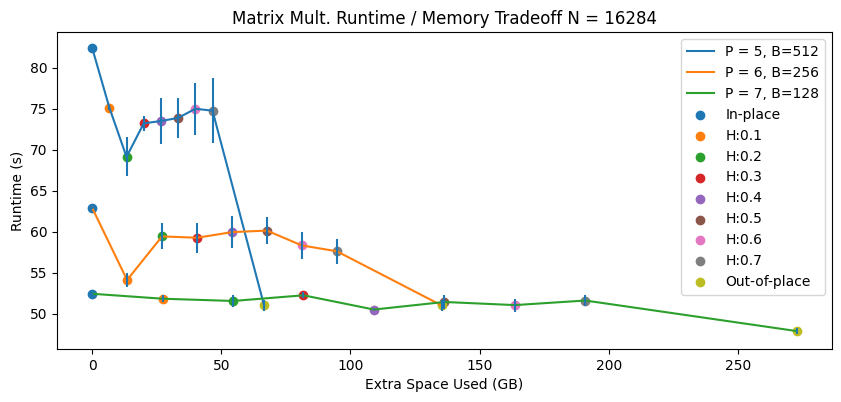

In [95]:
width = 10
height_ratio = 0.41114
fig = plt.figure(figsize=(width, width * height_ratio))
n_rows = 1
n_cols = 1
width_ratios = [3.0,]
height_ratios = [1.0]
gs1 = fig.add_gridspec(
    n_rows, n_cols,
    width_ratios = width_ratios, 
    height_ratios = height_ratios,
    wspace = 0.15,
    hspace = 0.15,
)
main_ax = fig.add_subplot(gs1[0, 0])
#colorbar_ax = fig.add_subplot(gs1[0, 1])


#main_ax.set_yscale('log')
#main_ax.set_xscale('log')
main_ax.plot(p5_mem, p5_data_np[:,2], label="P = 5, B=512")
main_ax.plot(p6_mem, p6_data_np[:,2], label="P = 6, B=256")
main_ax.plot(p7_mem, p7_data_np[:,2], label="P = 7, B=128")
for i in range(0, len(labels)):
    t1_error = main_ax.errorbar(
        [x[i] for x in [p5_mem, p6_mem, p7_mem]], 
        [x[:,2][i] for x in [p5_data_np, p6_data_np, p7_data_np]], 
        yerr = [x[:,3][i] for x in [p5_data_np, p6_data_np, p7_data_np]],
        fmt = 'none')
    t1_scatter = main_ax.scatter(
        [x[i] for x in [p5_mem, p6_mem, p7_mem]], 
        [x[:,2][i] for x in [p5_data_np, p6_data_np, p7_data_np]], 
        label=labels[i])


main_ax.set_xlabel("Extra Space Used (GB)")
main_ax.set_ylabel("Runtime (s)")
main_ax.set_title("Matrix Mult. Runtime / Memory Tradeoff N = 16284")
main_ax.legend()


plt.show()

In [63]:
[(m * 8) / 1e9 for m in p6_mem_usage

[0.0,
 1.082331758592e-07,
 2.164663517184e-07,
 3.2469952757759994e-07,
 4.329327034368e-07,
 5.41165879296e-07,
 6.493990551551999e-07,
 7.576322310143999e-07,
 1.082331758592e-06]

In [64]:
16384.0 * 16384.0

268435456.0